In [1]:
# library for data manipulation and analysis (especially data frames)
import graphviz
# library for visualisation
import matplotlib.pyplot as plt
# library adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions 
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sb
from IPython.display import Image
from sklearn.metrics import confusion_matrix as cm
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
# read in data and save in variable df
df = pd.read_csv("titanic_data.csv", sep=",", index_col=0)
df_copy = df.copy()

In [3]:
# Here we just want ti have a quick outlook of the data
df.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
703,704,3rd,0,"Cann, Mr Ernest",21.0,Southampton,NaN,NaN,NaN,NaN,male
260,261,1st,1,"Taylor, Mrs Elmer Zebley (Juliet Cummins Wright)",NaN,Southampton,"London / East Orange, NJ",C-126,NaN,5,female
153,154,1st,0,"Kent, Mr Edward Austin",58.0,Cherbourg,"Buffalo, NY",NaN,NaN,(258),male


In [4]:
# Task 1
# 1. Count how many people embarked from each city using the .value_counts()
df.value_counts("embarked")

embarked
Southampton    174
Cherbourg       58
Queenstown      18
Name: count, dtype: int64

<Axes: xlabel='pclass'>

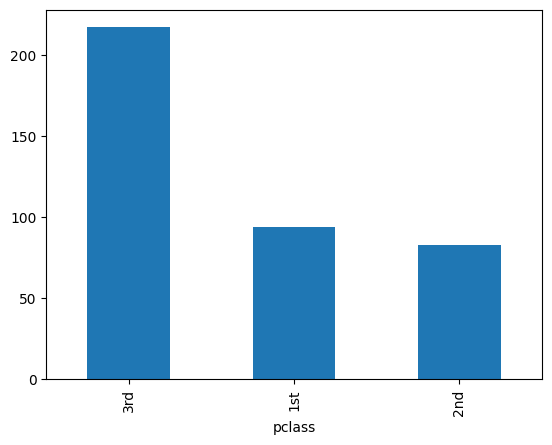

In [5]:
# 2. Barplot that shows how many people were in each class ( pclass )
df['pclass'].value_counts(ascending=False).plot(kind='bar')

In [6]:
# 3. Select the first 15 rows and save them as a data frame named df_subset.
df_subset = df.head(15).copy()
df_subset


,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
703,704,3rd,0,"Cann, Mr Ernest",21.0,Southampton,NaN,NaN,NaN,NaN,male
260,261,1st,1,"Taylor, Mrs Elmer Zebley (Juliet Cummins Wright)",NaN,Southampton,"London / East Orange, NJ",C-126,NaN,5,female
153,154,1st,0,"Kent, Mr Edward Austin",58.0,Cherbourg,"Buffalo, NY",NaN,NaN,(258),male
606,607,3rd,1,"Abelseth, Miss Anna Karen",16.0,Southampton,"Norway Los Angeles, CA",NaN,NaN,16,female
448,449,2nd,0,"Hold, Mr Stephen",42.0,Southampton,"England / Sacramento, CA",NaN,NaN,NaN,male
440,441,2nd,0,"Hickman, Mr Lewis",32.0,Southampton,"West Hampstead, London / Neepawa, MB",NaN,NaN,NaN,male
517,518,2nd,0,"Norman, Mr Robert Douglas",NaN,Southampton,Glasgow,NaN,NaN,(287),male
933,934,3rd,1,"Kink, Miss Louise Gretchen",NaN,NaN,NaN,NaN,NaN,NaN,female
1276,1277,3rd,0,"Van Impe, Miss Catharine",NaN,NaN,NaN,NaN,NaN,NaN,female
487,488,2nd,0,"Mack, Mrs Mary",57.0,Southampton,"Southampton / New York, NY",E77,NaN,(52),female


In [7]:
survivors = df_subset[df_subset["survived"] == True]
survivors

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
260,261,1st,1,"Taylor, Mrs Elmer Zebley (Juliet Cummins Wright)",NaN,Southampton,"London / East Orange, NJ",C-126,NaN,5,female
606,607,3rd,1,"Abelseth, Miss Anna Karen",16.0,Southampton,"Norway Los Angeles, CA",NaN,NaN,16,female
933,934,3rd,1,"Kink, Miss Louise Gretchen",NaN,NaN,NaN,NaN,NaN,NaN,female
692,693,3rd,1,"Buckley, Mr Daniel",21.0,Queenstown,"Kingwilliamstown, Co Cork, Ireland New York, NY",NaN,NaN,NaN,male
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0,Southampton,"Hudson, NY",D-7,13502 L77,10,female


In [8]:
# implement your decision tree in Python
def survival_decision_tree(row):
    if (row["sex"] == "female" and row["pclass"] != "2nd" and row["row.names"] < 1277) or (row["sex"] == "male" and row["embarked"] == "Queenstown"):
        return True
    else:
        return False

# apply decision tree function to subset
df_subset['predicted_survival'] = df_subset.apply(survival_decision_tree, axis=1)
df_subset[df_subset["predicted_survival"] == True]

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,predicted_survival
260,261,1st,1,"Taylor, Mrs Elmer Zebley (Juliet Cummins Wright)",NaN,Southampton,"London / East Orange, NJ",C-126,NaN,5,female,True
606,607,3rd,1,"Abelseth, Miss Anna Karen",16.0,Southampton,"Norway Los Angeles, CA",NaN,NaN,16,female,True
933,934,3rd,1,"Kink, Miss Louise Gretchen",NaN,NaN,NaN,NaN,NaN,NaN,female,True
692,693,3rd,1,"Buckley, Mr Daniel",21.0,Queenstown,"Kingwilliamstown, Co Cork, Ireland New York, NY",NaN,NaN,NaN,male,True
899,900,3rd,0,"Johnston, Mrs Andrew G.",NaN,NaN,NaN,NaN,NaN,NaN,female,True
6,7,1st,1,"Andrews, Miss Kornelia Theodosia",63.0,Southampton,"Hudson, NY",D-7,13502 L77,10,female,True


In [9]:
# and apply the decision tree to the complete data set
df['predicted_survival'] = df.apply(survival_decision_tree, axis=1)
predicted_survivors = df[df["predicted_survival"] == True]
survivors = df[df["survived"] == True]
predicted_survivors

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex,predicted_survival
260,261,1st,1,"Taylor, Mrs Elmer Zebley (Juliet Cummins Wright)",NaN,Southampton,"London / East Orange, NJ",C-126,NaN,5,female,True
606,607,3rd,1,"Abelseth, Miss Anna Karen",16.0,Southampton,"Norway Los Angeles, CA",NaN,NaN,16,female,True
933,934,3rd,1,"Kink, Miss Louise Gretchen",NaN,NaN,NaN,NaN,NaN,NaN,female,True
692,693,3rd,1,"Buckley, Mr Daniel",21.0,Queenstown,"Kingwilliamstown, Co Cork, Ireland New York, NY",NaN,NaN,NaN,male,True
899,900,3rd,0,"Johnston, Mrs Andrew G.",NaN,NaN,NaN,NaN,NaN,NaN,female,True
...,...,...,...,...,...,...,...,...,...,...,...,...
311,312,1st,1,"LeRoy, Miss Berthe",NaN,Cherbourg,NaN,NaN,NaN,2,female,True
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female,True
157,158,1st,1,"Kimball, Mrs Edwin Nelson Jr. (Gertrude Parsons)",40.0,Southampton,"Boston, MA",NaN,NaN,5,female,True
89,90,1st,1,"Douglas, Mrs Walter Donald (Mahala Dutton)",48.0,Cherbourg,"Deephaven, MN / Cedar Rapids, IA",NaN,NaN,2,female,True


In [10]:
((df['survived'] == 1) & (df['predicted_survival'] == 1)).sum()

73

In [11]:
# In our case the number of survivors is 123 compared to the actual number 134

print(f"Predicted number of survivors:\t{len(predicted_survivors)}")
print(f"Actual number:\t\t\t{(df['survived'] == 1).sum()}")
print(f"True positives:\t\t\t{((df['survived'] == 1) & (df['predicted_survival'] == 1)).sum()}")

Predicted number of survivors:	123
Actual number:			134
True positives:			73


In [12]:
actual = df["survived"]
predicted = df["predicted_survival"]

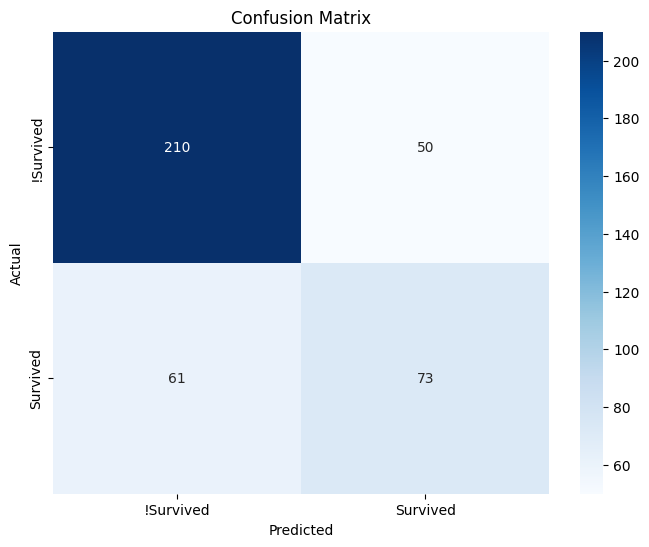

In [13]:
# X -> predictions
# y -> labels
plt.figure(figsize=(8, 6))
sb.heatmap(cm(actual, predicted),
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=["!Survived", "Survived"],
            yticklabels=["!Survived", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 7. Why might your decision tree not correctly classify all new data points?
Limited data and complex relationships as well as overfitting are reason that might lead to the poor result of our heuristic approach.

#### Is this a problem of over- or under-fitting?
Our decision tree is clearly overfitting as 101 results were misclassified as the on the whole dataset (df) but only 1 in the original training batch (df_subset).
- One example of overfitting is that the condition accurately represent the training data (df_subset) but does not work accurately on the whole dataset (df).
- One example of underfitting would be that the condition does not accurately represent the training data (df_subset) and would perform approximately the same way on the whole dataset (df).

### 8. What do you think are the advantages of these approaches?
Decision trees such as support vectors machine (SVMs), offer interpretability, efficiency, robustness, and ease of use for creditworthiness analysis, but may lack neural networks' accuracy and efficiency. Also, SVMs are pretty computationnaly expensive compared to good neural network approaches.

# Automatic Decision Tree

## Data Preprocessing

In [14]:
# X -> predictions
# y -> labels
le = LabelEncoder()
df_copy = df_copy.apply(le.fit_transform)

In [15]:
X = df_copy.drop(columns=["survived"])
y = df_copy["survived"]

clf = DecisionTreeClassifier()
clf.fit(X, y)

dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['!Survived', 'Survived'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('mydecisiontree.png')

True